In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import simulation_processes.simulator as tsim
import os


### T-PoP, Threshold = 100%, Number of Simulations = 100, 1000 Agents, depth 2, 2 witnesses per depth

### Plots for absolute values of True Positives, True Negatives, False Positives and False Negatives

In [9]:
directory_pathfile = '/Users/amm3117/Desktop/Tree-Proof-Of-Position-V2/simulations/depth_2_neighbours_2/'

dataset = tsim.full_csv(directory_pathfile)
simulations = pd.DataFrame(dataset)



In [10]:
simulations.shape

(1705, 15)

In [11]:
simulations

,Unnamed: 0,Simulation number,Probability of honest cars,Probability of coerced cars,Density,Threshold,Accuracy,True Positives,True Negatives,False Positives,False Negatives,Percent True Positives,Percent True Negatives,Percent False Positives,Percent False Negatives
0,0,0,1.0,0.9,750.0,1.0,81.666667,2450,0,0,550,81.666667,0.000000,18.333333,100.000000
1,1,1,1.0,0.9,750.0,1.0,80.733333,2422,0,0,578,80.733333,0.000000,19.266667,100.000000
2,2,2,1.0,0.9,750.0,1.0,82.533333,2476,0,0,524,82.533333,0.000000,17.466667,100.000000
3,3,3,1.0,0.9,750.0,1.0,82.566667,2477,0,0,523,82.566667,0.000000,17.433333,100.000000
4,4,4,1.0,0.9,750.0,1.0,82.666667,2480,0,0,520,82.666667,0.000000,17.333333,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0.8,0.8,750.0,1.0,68.566667,1968,89,534,409,82.793437,14.285714,17.206563,85.714286
1,1,1,0.8,0.8,750.0,1.0,68.366667,1947,104,519,430,81.909971,16.693419,18.090029,83.306581
2,2,2,0.8,0.8,750.0,1.0,68.466667,1960,94,529,417,82.456878,15.088283,17.543122,84.911717
3,3,3,0.8,0.8,750.0,1.0,70.466667,1995,119,504,382,83.929323,19.101124,16.070677,80.898876


[[ 0.          0.          0.        ]
 [ 0.          0.1         0.        ]
 [ 0.          0.2         0.        ]
 [ 0.          0.3         0.        ]
 [ 0.          0.4         0.        ]
 [ 0.          0.5         0.        ]
 [ 0.          0.6         0.        ]
 [ 0.          0.7         0.        ]
 [ 0.          0.8         0.        ]
 [ 0.          0.9         0.        ]
 [ 0.          1.          0.        ]
 [ 0.1         0.         98.25454545]
 [ 0.1         0.1        98.29931973]
 [ 0.1         0.2        96.35135135]
 [ 0.1         0.3        97.75280899]
 [ 0.1         0.4        95.67213115]
 [ 0.1         0.5        94.03508772]
 [ 0.1         0.6        92.55474453]
 [ 0.1         0.7        89.51140065]
 [ 0.1         0.8        89.14285714]
 [ 0.1         0.9        85.62091503]
 [ 0.1         1.         80.35842294]
 [ 0.2         0.         97.20848057]
 [ 0.2         0.1        97.37373737]
 [ 0.2         0.2        95.92039801]
 [ 0.2         0.3       

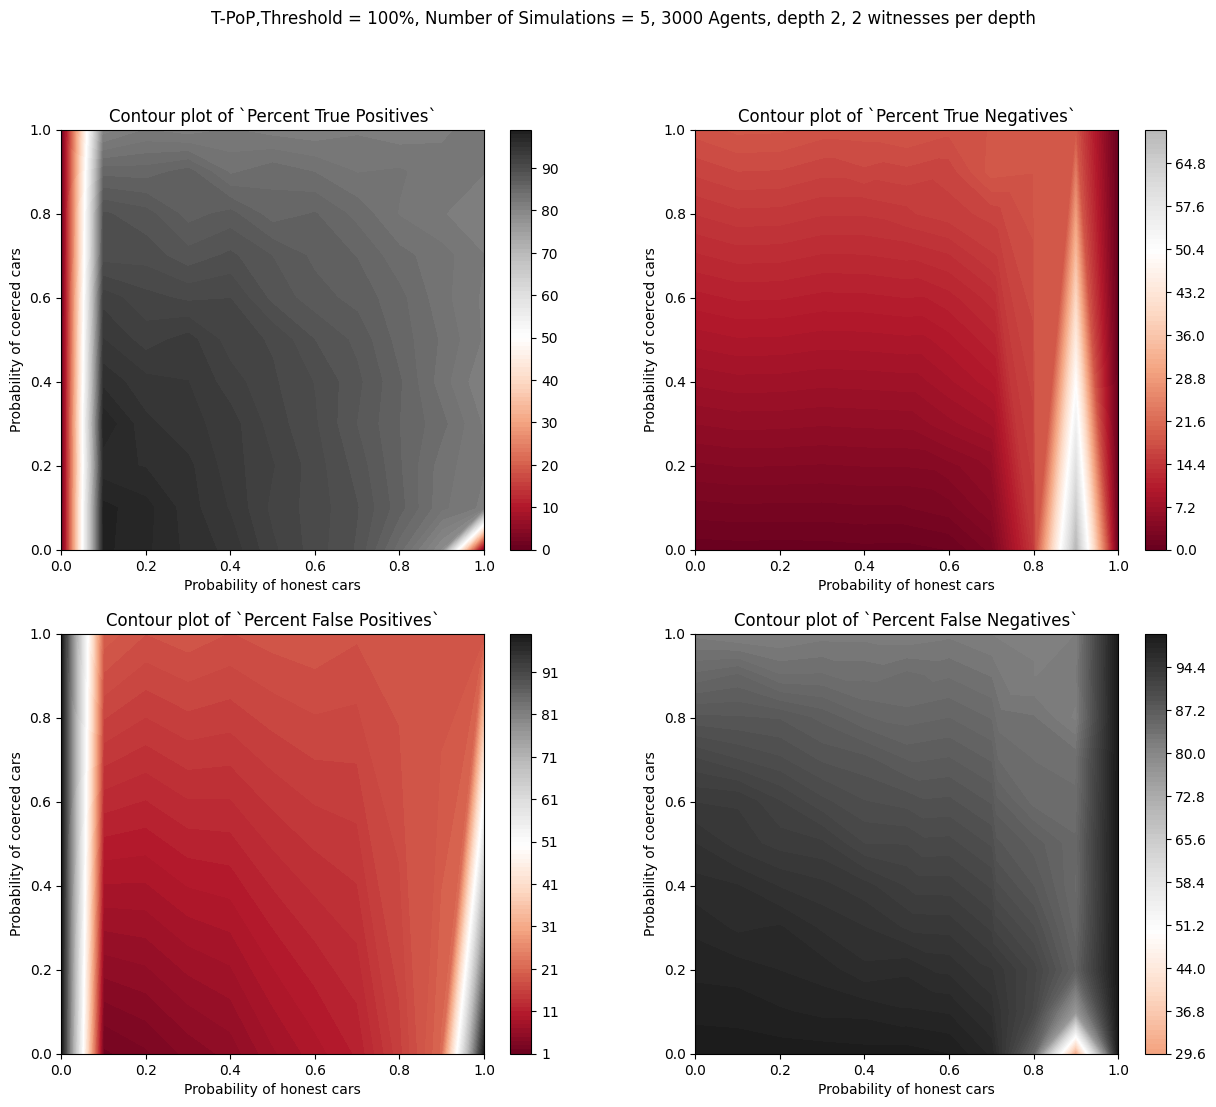

In [14]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15,12))


fig.suptitle('T-PoP,Threshold = 100%, Number of Simulations = 5, 3000 Agents, depth 2, 2 witnesses per depth')
directory_pathfile = '/Users/amm3117/Desktop/Tree-Proof-Of-Position-V2/simulations/depth_2_neighbours_2/'
dataset = tsim.full_csv(directory_pathfile)

vars = ['Percent True Positives', 'Percent True Negatives', 'Percent False Positives', 'Percent False Negatives']
simulations = pd.DataFrame(dataset)
for i, ax in enumerate(axes.flat):
    
    z = vars[i]
    x = 'Probability of honest cars'
    y = 'Probability of coerced cars'


    df_temp = simulations[[x, y, z]].reset_index(drop=True)
    df_temp = df_temp.groupby([x, y]).mean().reset_index()
    #print(df_temp.sort_values([x, y]))
    print(df_temp.values)
    xlist = df_temp[x].values
    ylist = df_temp[y].values
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros(X.shape)
    print('here',X)
    #for each FP that equals 0, set it to a very small value below 1/1000 
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z_val = df_temp[z][
                (df_temp[y] == Y[i, j]) & (df_temp[x] == X[i, j])
            ]
            if z_val.empty:
                Z[i, j] = None

            else:
                Z[i, j] = z_val
    
    cp = ax.contourf(X, Y, Z, vmin = 0.000000, vmax = 100, cmap='RdGy', levels = 100)
    
    ax.set_title(f'Contour plot of `{z}`')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.colorbar(cp, ax=ax)
#fig.colorbar(cp)

ax = fig.get_figure()
#ax.savefig(directory_pathfile +'\\full_data.csv' + '\\plots' + 'subplots.png')

i 0 z Percent True Positives
i 1 z Percent True Negatives
i 2 z Percent False Positives
i 3 z Percent False Negatives


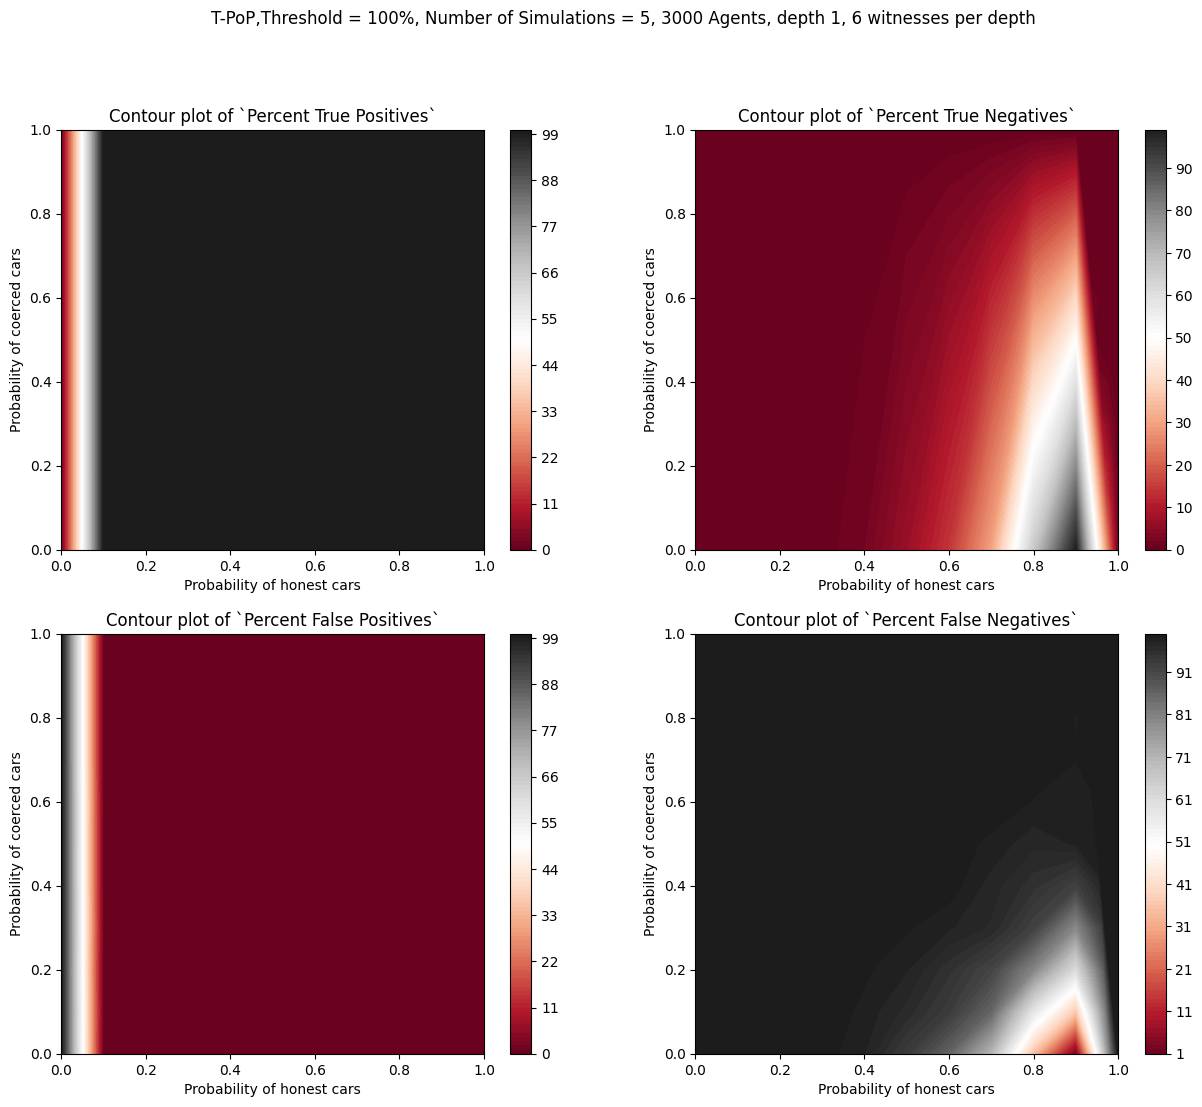

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15,12))


fig.suptitle('T-PoP,Threshold = 100%, Number of Simulations = 5, 3000 Agents, depth 1, 6 witnesses per depth')

directory_pathfile = '/Users/amm3117/Desktop/Tree-Proof-Of-Position-V2/simulations/depth_1_neighbours_6/'

dataset = tsim.full_csv(directory_pathfile)
simulations = pd.DataFrame(dataset)# loading dataset

vars = ['Percent True Positives', 'Percent True Negatives', 'Percent False Positives', 'Percent False Negatives']
for i, ax in enumerate(axes.flat):
    print('i', i, 'z', vars[i])
    z = vars[i]

    x = 'Probability of honest cars'
    y = 'Probability of coerced cars'


    df_temp = simulations[[x, y, z]].reset_index(drop=True)
    df_temp = df_temp.groupby([x, y]).mean().reset_index()

    xlist = df_temp[x].values
    ylist = df_temp[y].values
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros(X.shape)
    #for each FP that equals 0, set it to a very small value below 1/1000 
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z_val = df_temp[z][
                (df_temp[y] == Y[i, j]) & (df_temp[x] == X[i, j])
            ]
            if z_val.empty:
                Z[i, j] = None

            else:
                Z[i, j] = z_val
    
    cp = ax.contourf(X, Y, Z, vmin = 0.000000, vmax = 100, cmap='RdGy', levels = 100)
    
    ax.set_title(f'Contour plot of `{z}`')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.colorbar(cp, ax=ax)
#fig.colorbar(cp)

ax = fig.get_figure()
#ax.savefig(directory_pathfile +'\\full_data.csv' + '\\plots' + 'subplots.png')